In [ ]:
!nvidia-smi

Wed Jun 12 13:17:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!!pip install ultralytics


['Requirement already satisfied: ultralytics in /usr/local/lib/python3.10/dist-packages (8.2.31)',
 'Requirement already satisfied: matplotlib>=3.3.0 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (3.7.1)',
 'Requirement already satisfied: opencv-python>=4.6.0 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (4.8.0.76)',
 'Requirement already satisfied: pillow>=7.1.2 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (9.4.0)',
 'Requirement already satisfied: pyyaml>=5.3.1 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (6.0.1)',
 'Requirement already satisfied: requests>=2.23.0 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (2.31.0)',
 'Requirement already satisfied: scipy>=1.4.1 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (1.11.4)',
 'Requirement already satisfied: torch>=1.8.0 in /usr/local/lib/python3.10/dist-packages (from ultralytics) (2.3.0+cu121)',
 'Requirement already satisfied: torchvision>

In [ ]:
!!pip install roboflow

['Requirement already satisfied: roboflow in /usr/local/lib/python3.10/dist-packages (1.1.32)',
 'Requirement already satisfied: certifi==2023.7.22 in /usr/local/lib/python3.10/dist-packages (from roboflow) (2023.7.22)',
 'Requirement already satisfied: chardet==4.0.0 in /usr/local/lib/python3.10/dist-packages (from roboflow) (4.0.0)',
 'Requirement already satisfied: cycler==0.10.0 in /usr/local/lib/python3.10/dist-packages (from roboflow) (0.10.0)',
 'Requirement already satisfied: idna==2.10 in /usr/local/lib/python3.10/dist-packages (from roboflow) (2.10)',
 'Requirement already satisfied: kiwisolver>=1.3.1 in /usr/local/lib/python3.10/dist-packages (from roboflow) (1.4.5)',
 'Requirement already satisfied: matplotlib in /usr/local/lib/python3.10/dist-packages (from roboflow) (3.7.1)',
 'Requirement already satisfied: numpy>=1.18.5 in /usr/local/lib/python3.10/dist-packages (from roboflow) (1.25.2)',
 'Requirement already satisfied: opencv-python-headless==4.8.0.74 in /usr/local/li

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 0.2.8>=0.2.5


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="3uqW0zjCD2yjX7t9519E")
project = rf.workspace("muhammad-lazuardi-harahap").project("detection-mold-on-bread")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.31, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Detection-mold-on-bread--1 in yolov8:: 100%|██████████| 258/258 [00:00<00:00, 7826.50it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=45 imgsz=640 optimizer='Adam' plots=True

100% 49.7M/49.7M [00:00<00:00, 331MB/s]
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Detection-mold-on-bread--1/data.yaml, epochs=45, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

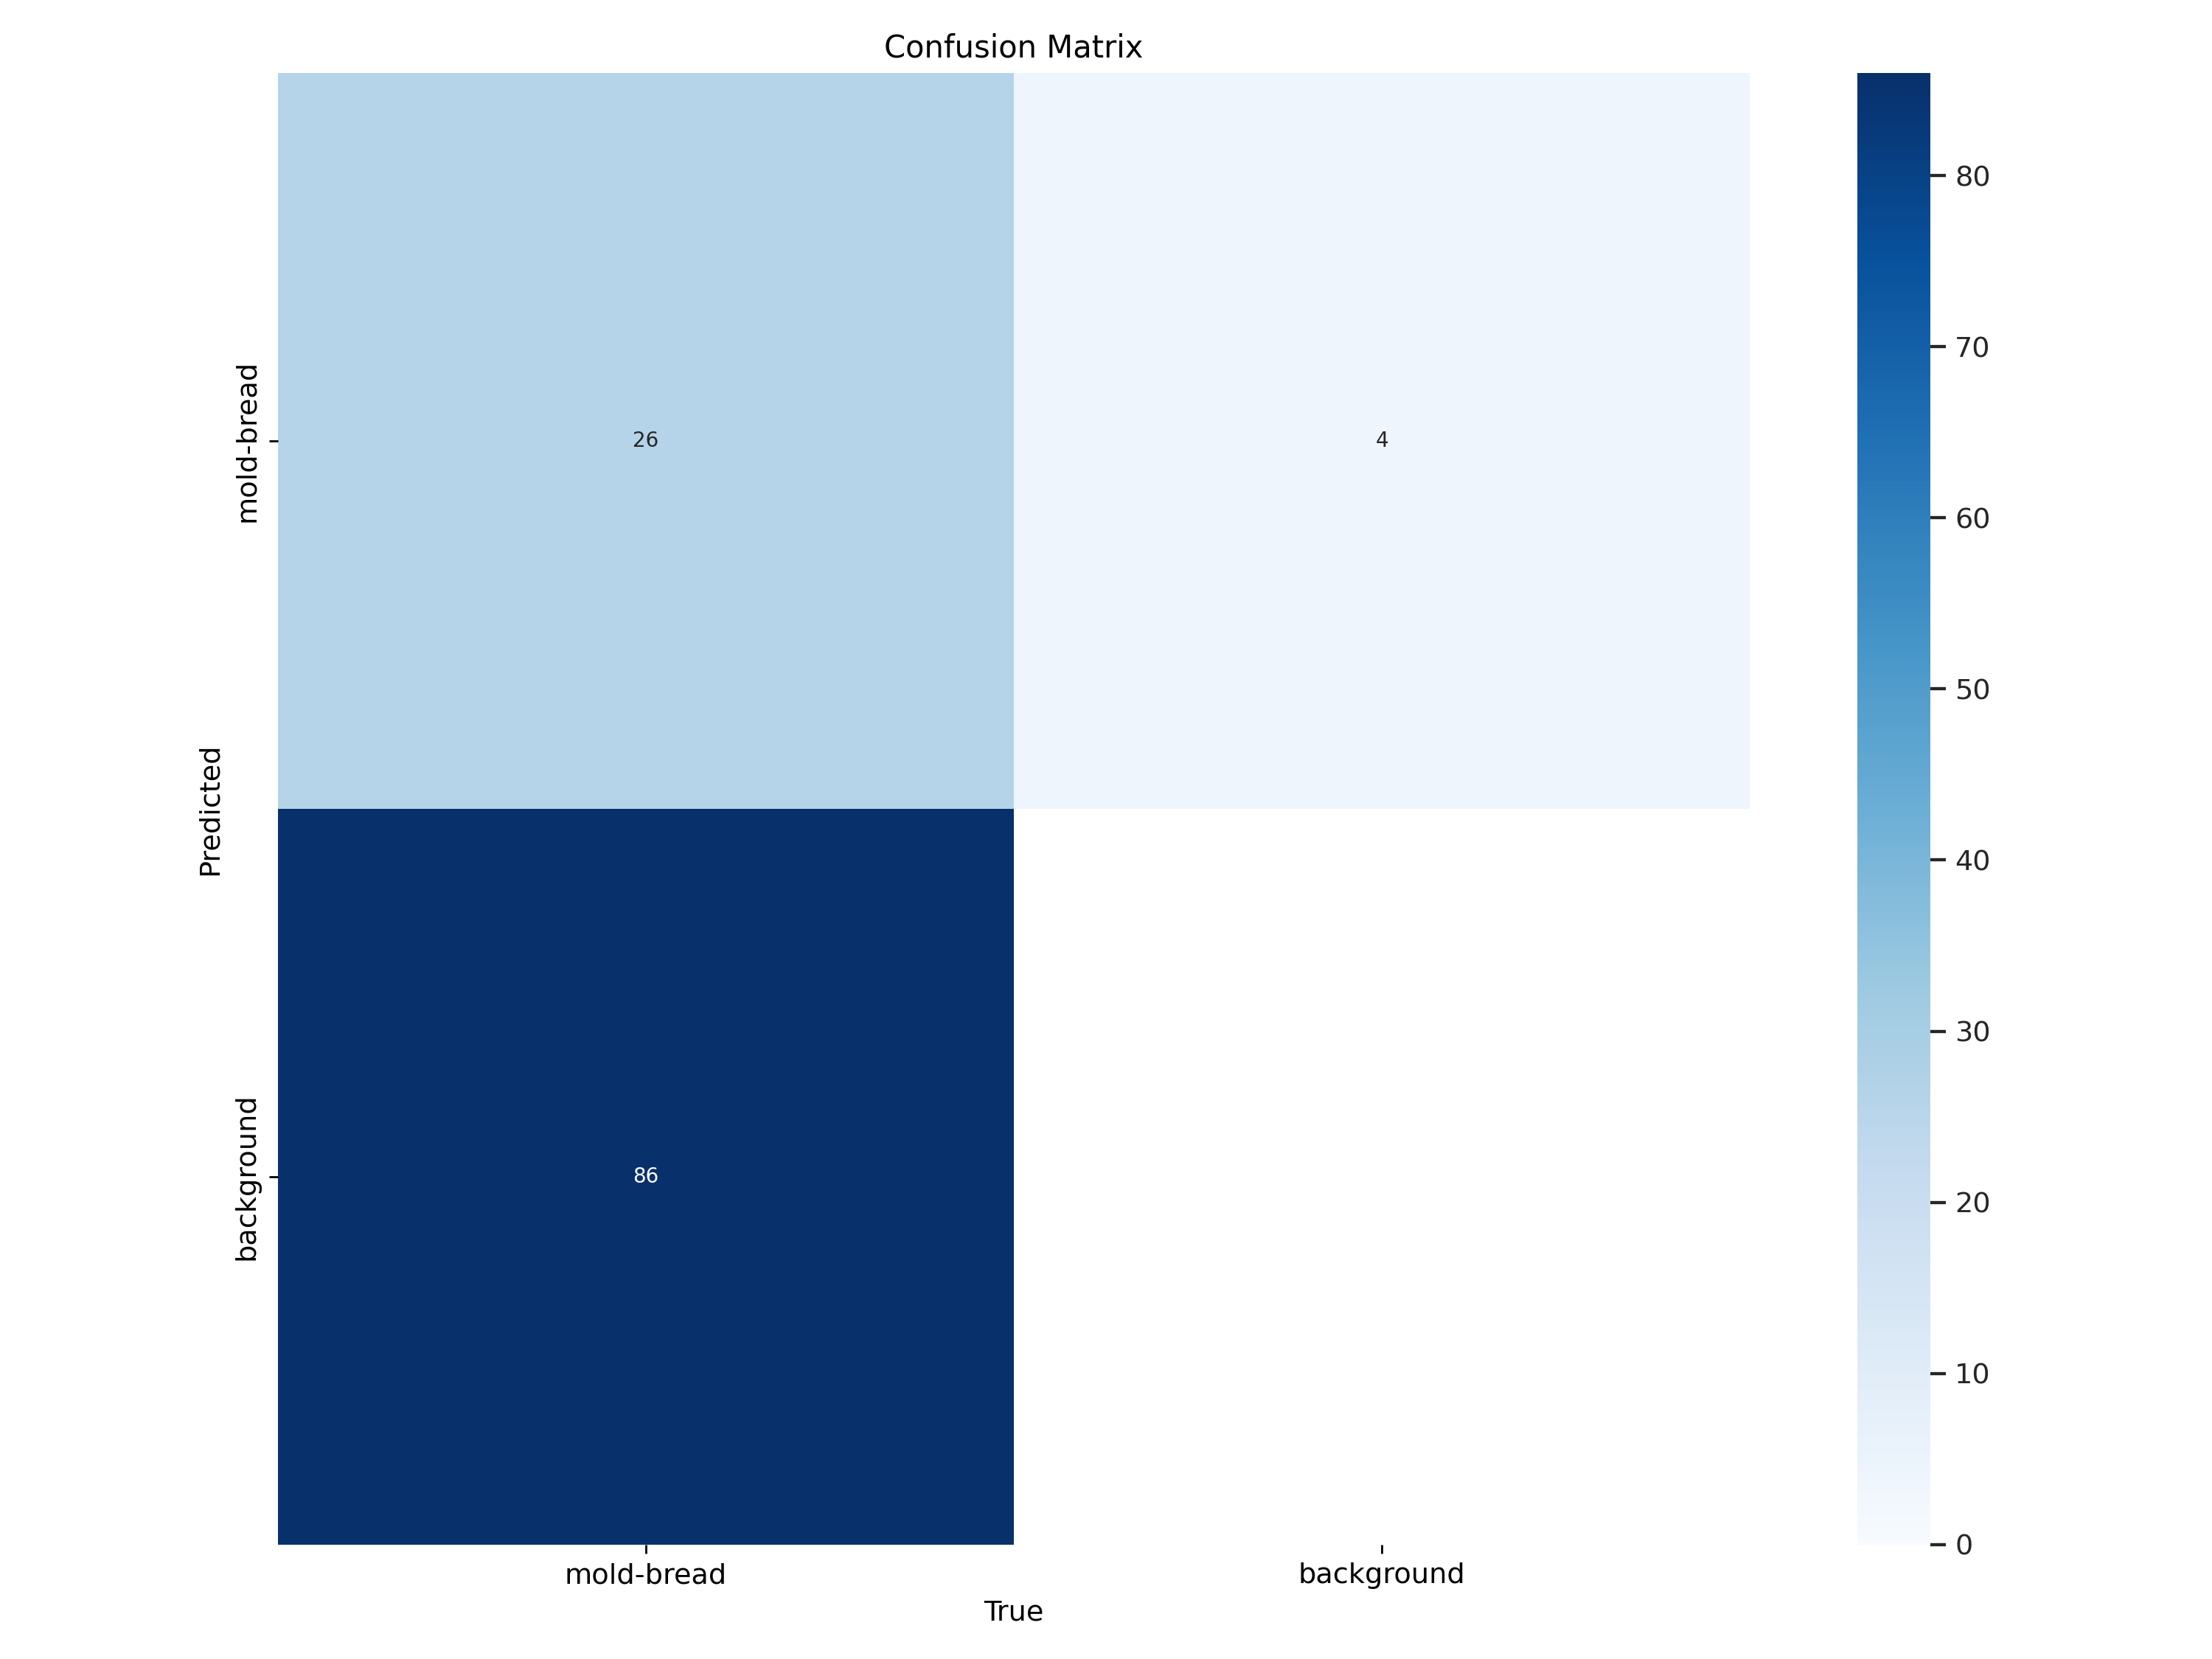

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

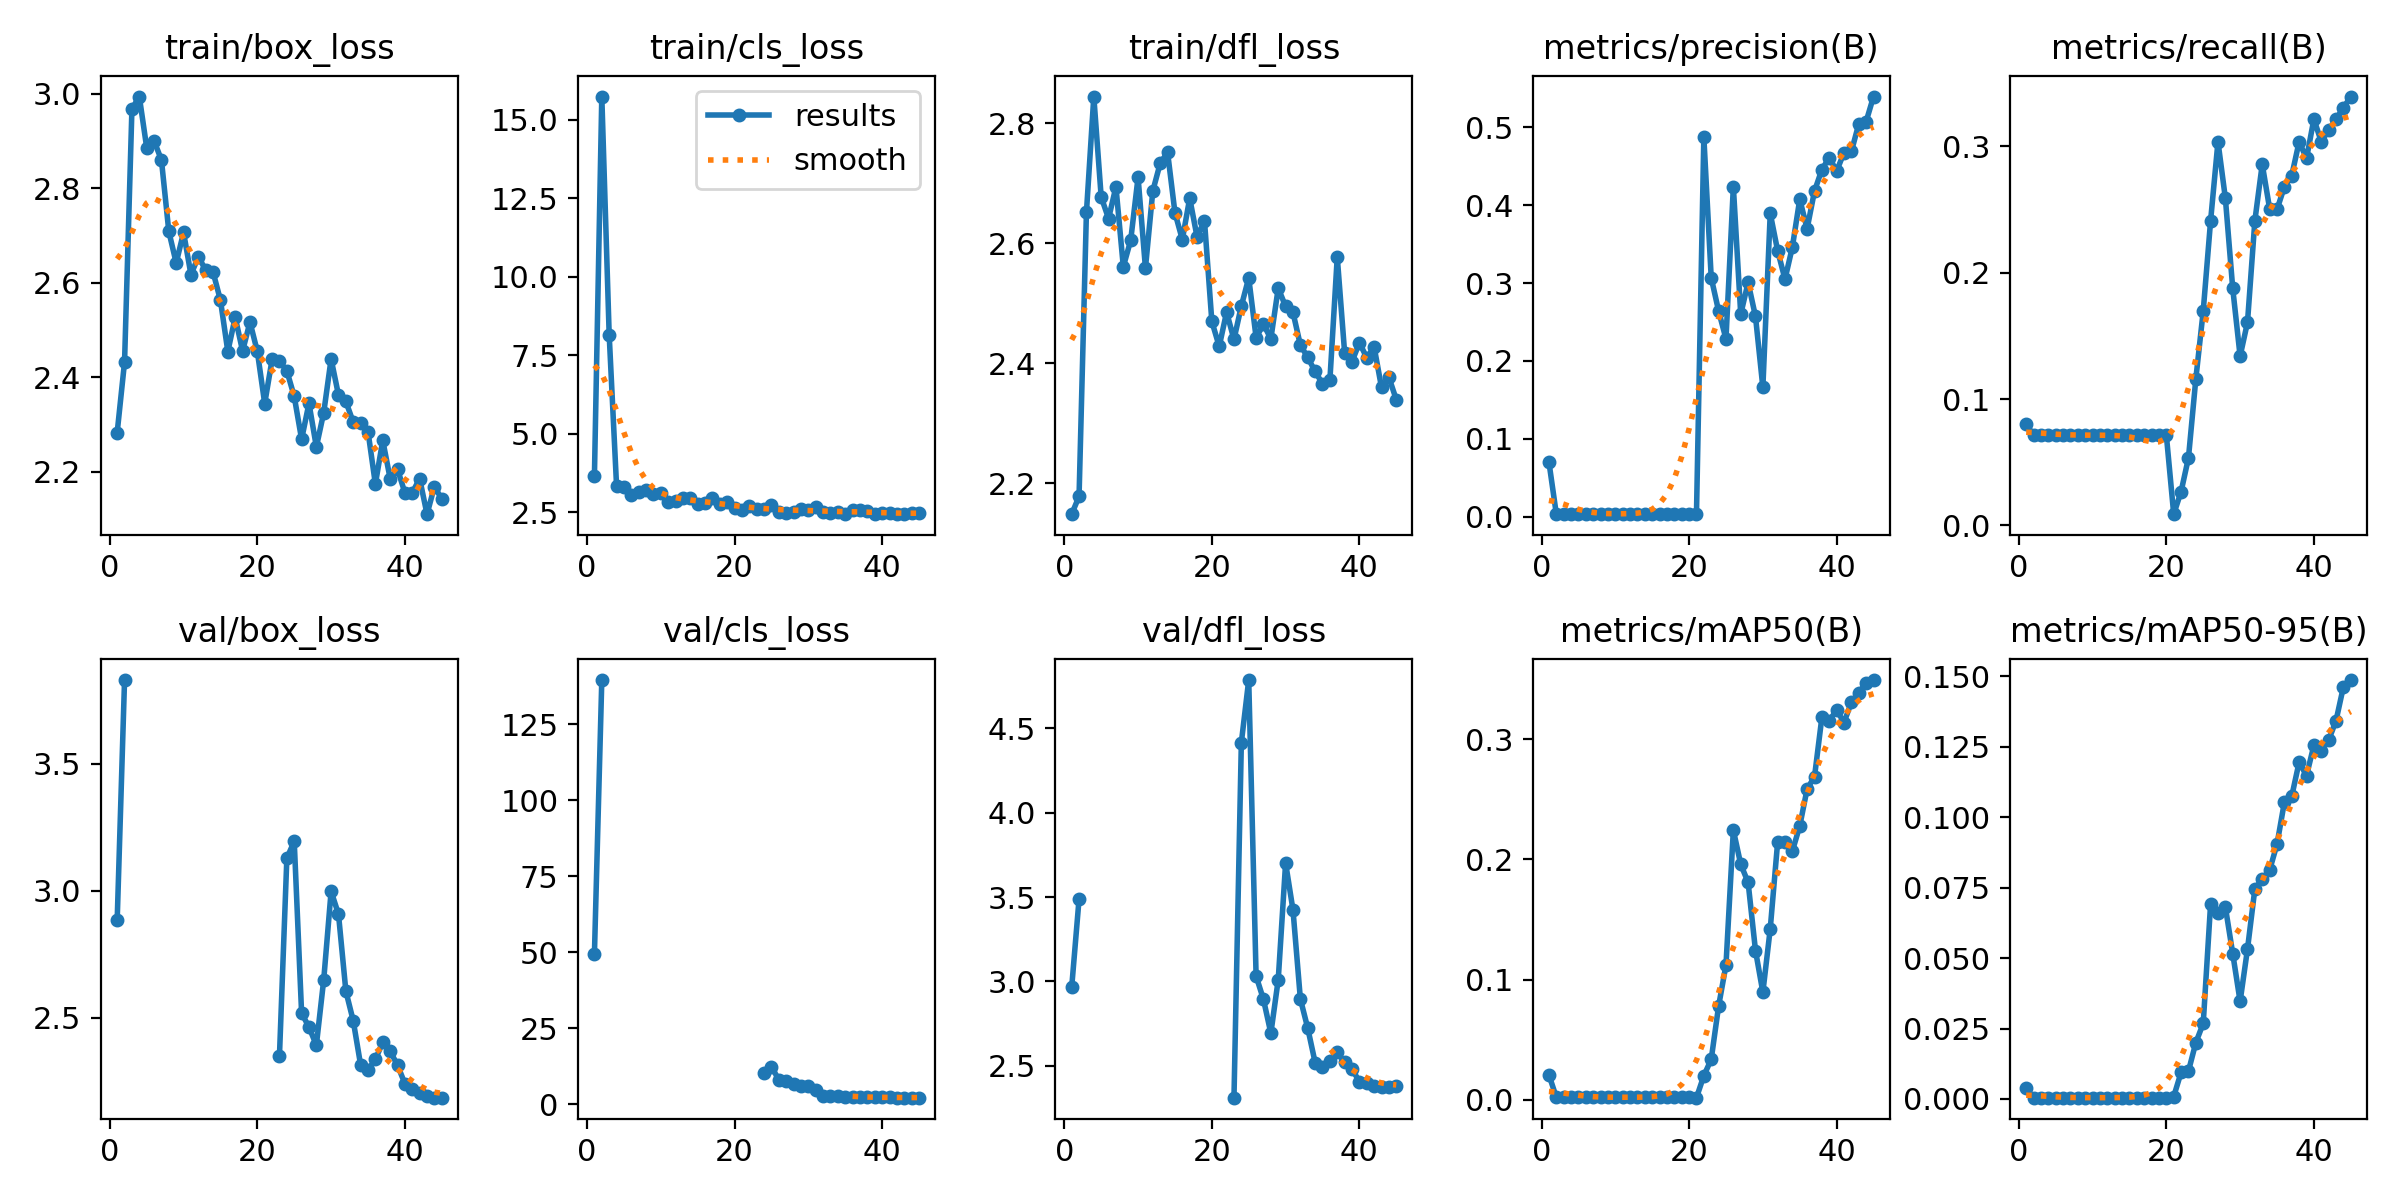

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Detection-mold-on-bread--1/valid/labels.cache... 24 images, 0 backgrounds, 0 corrupt: 100% 24/24 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.26s/it]
                   all         24        112      0.539      0.339      0.349      0.149
Speed: 5.7ms preprocess, 32.7ms inference, 0.0ms loss, 46.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/Detection-mold-on-bread--1/test/images

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/13 /content/Detection-mold-on-bread--1/test/images/240_F_321046579_nNviDPu6dPfLsXa707TrUwFfgg0AFBMs_jpg.rf.f2e5c7ab3179b638bafc95769a3519d9.jpg: 640x640 (no detections), 37.0ms
image 2/13 /content/Detection-mold-on-bread--1/test/images/36_jpg.rf.a2638245c9400b97df1396acd30c4290.jpg: 640x640 (no detections), 37.1ms
image 3/13 /content/Detection-mold-on-bread--1/test/images/38195601956_590638ef2a_m_jpg.rf.70f4b07a80a944e6db4b00e952d268bd.jpg: 640x640 (no detections), 37.0ms
image 4/13 /content/Detection-mold-on-bread--1/test/images/49217592852_c45eacc178_m_jpg.rf.bf75e7c97625a0a9467dd1ee881c88f0.jpg: 640x640 (no detections), 37.0ms
image 5/13 /content/Detection-mold-on-bread--1/test/images/58_jpg.rf.9093b2bffd20ad689fc0e030280e5906.jpg: 640x640 (no detections), 37.1ms
image 6/13 /content/Detection-mold-on-bread--1

In [ ]:
import glob
from IPython.display import Image, display

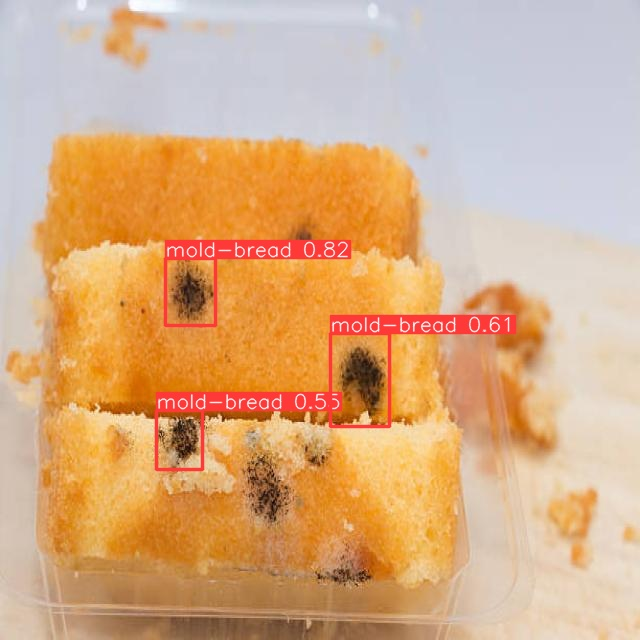

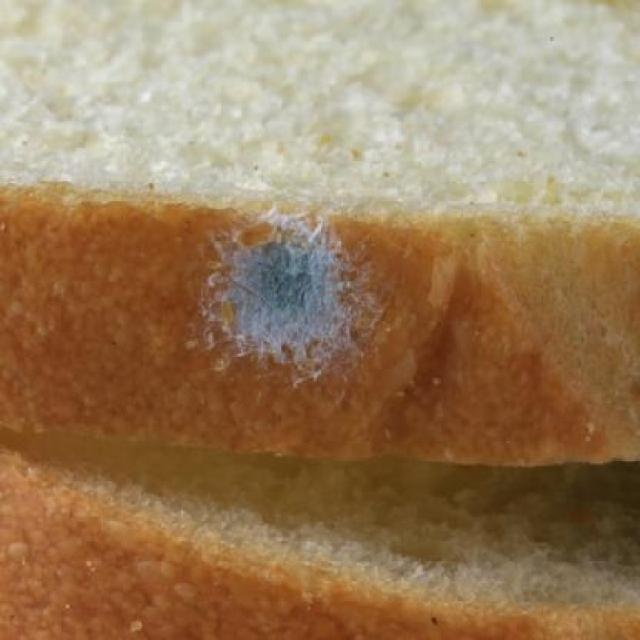

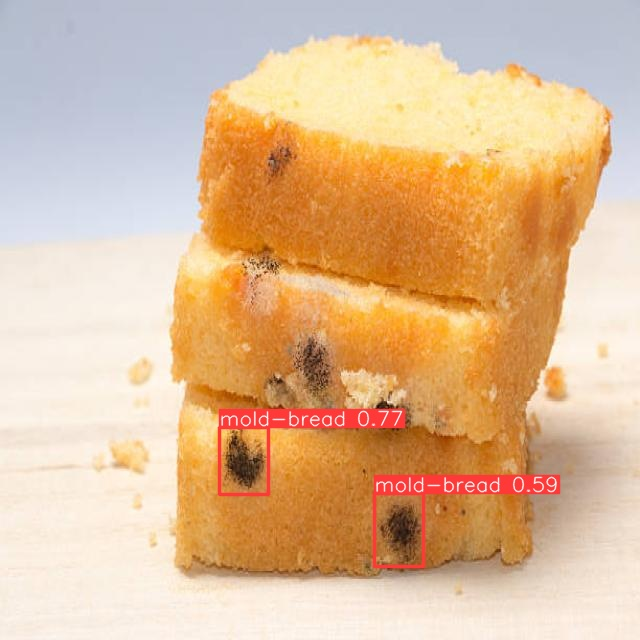

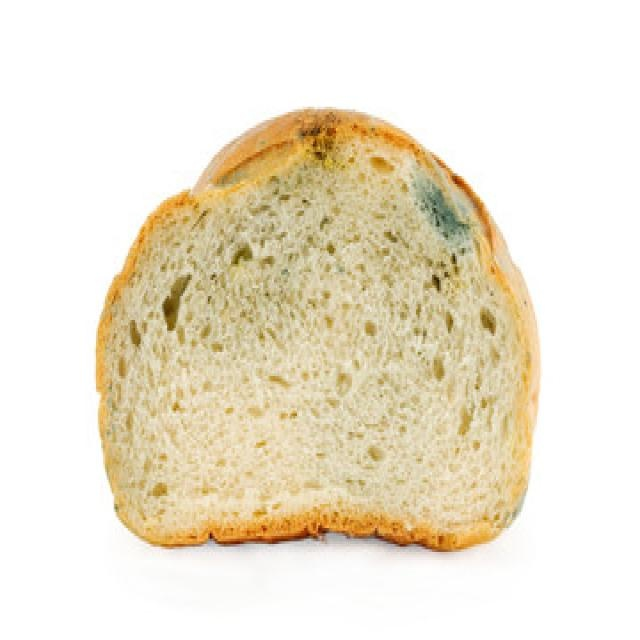

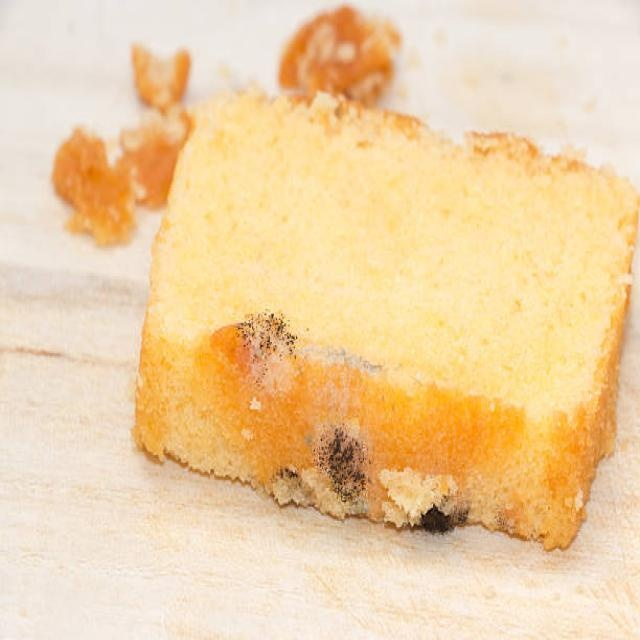

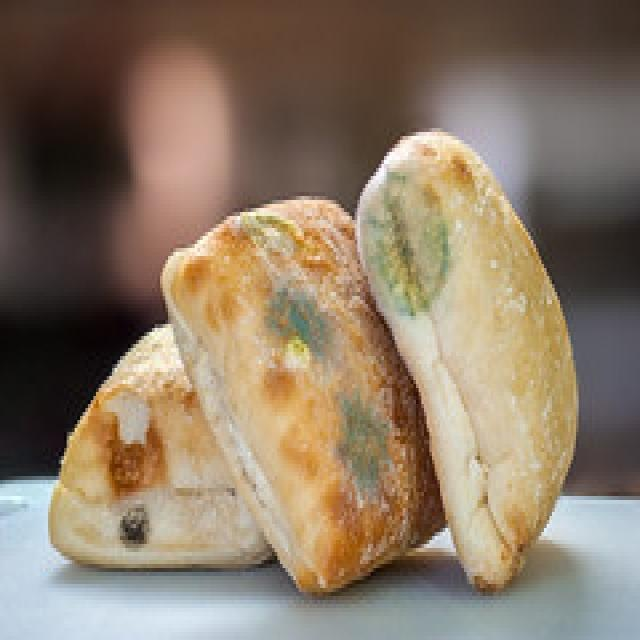

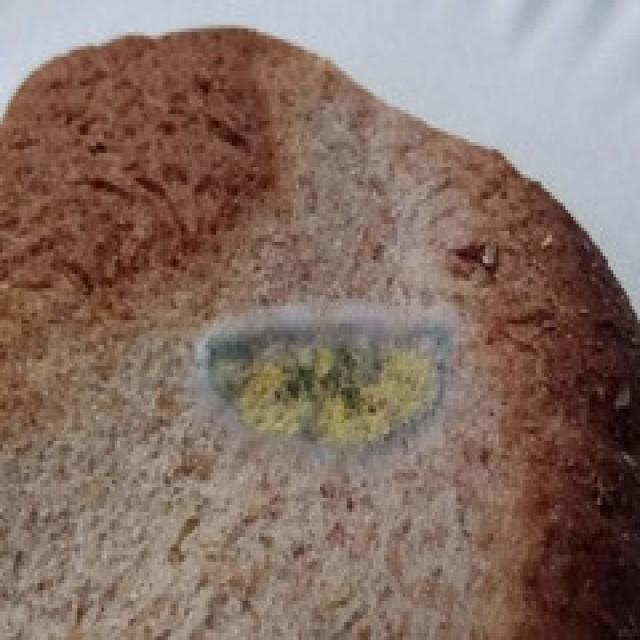

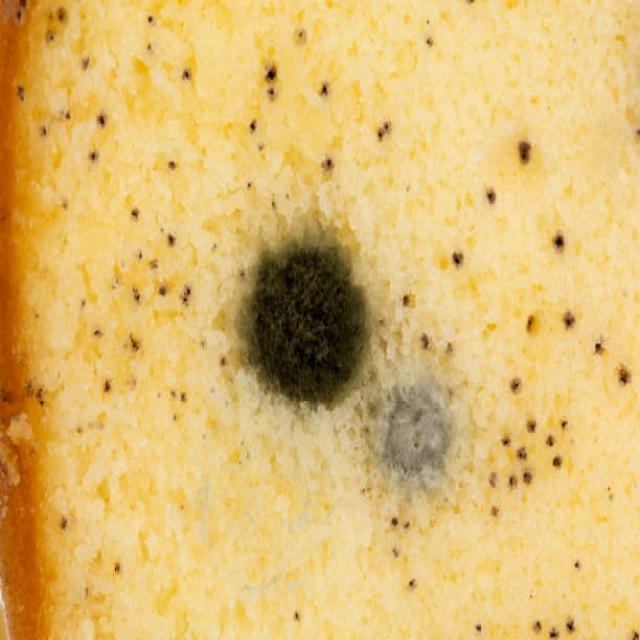

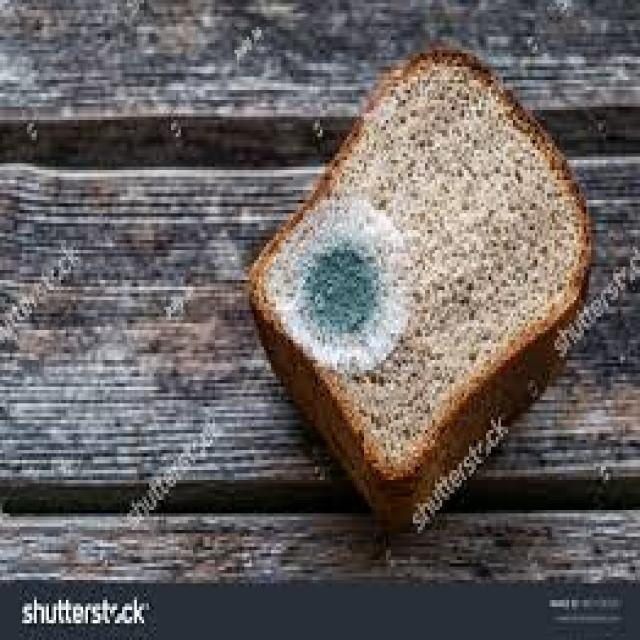

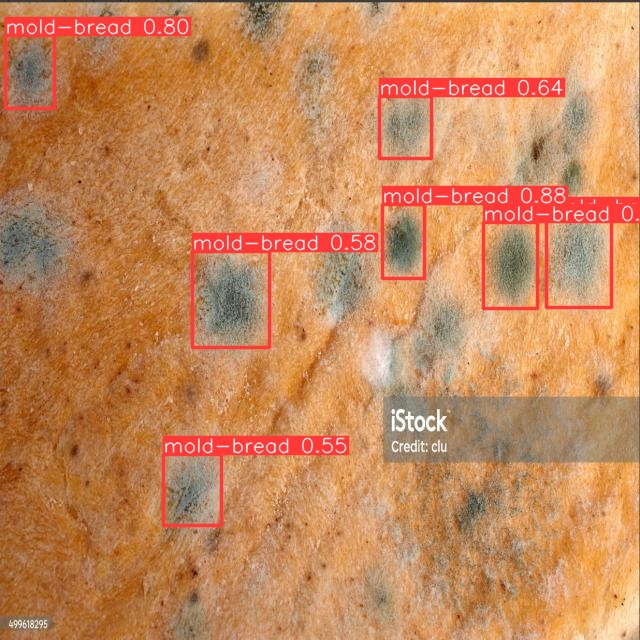

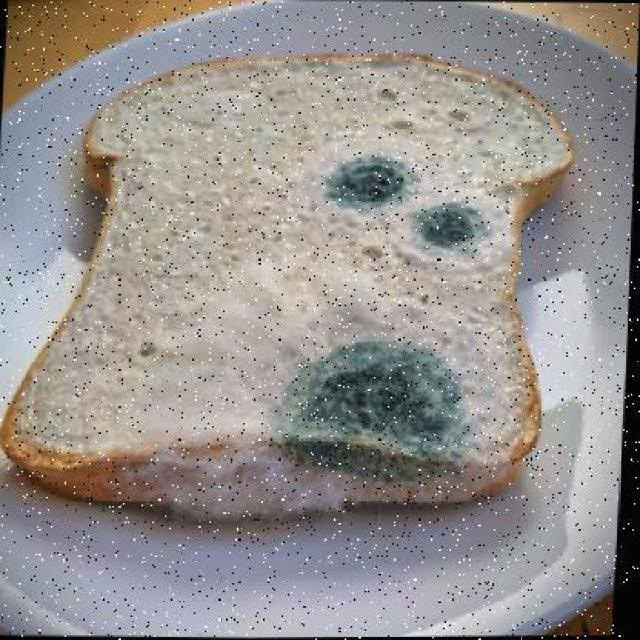

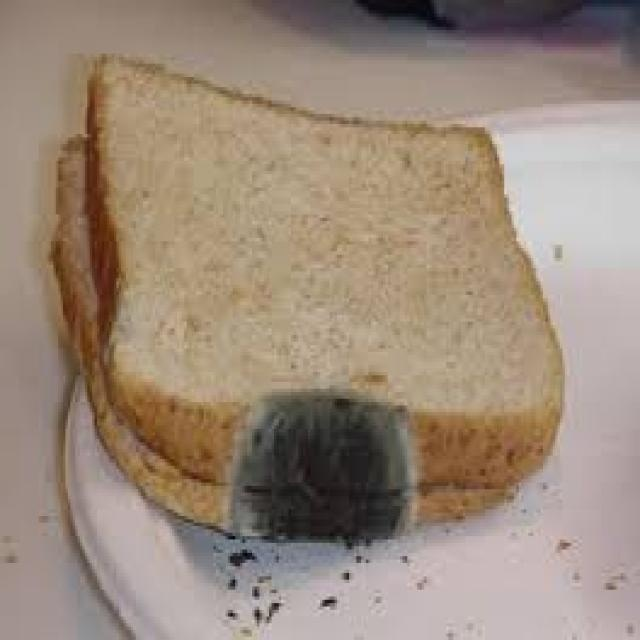

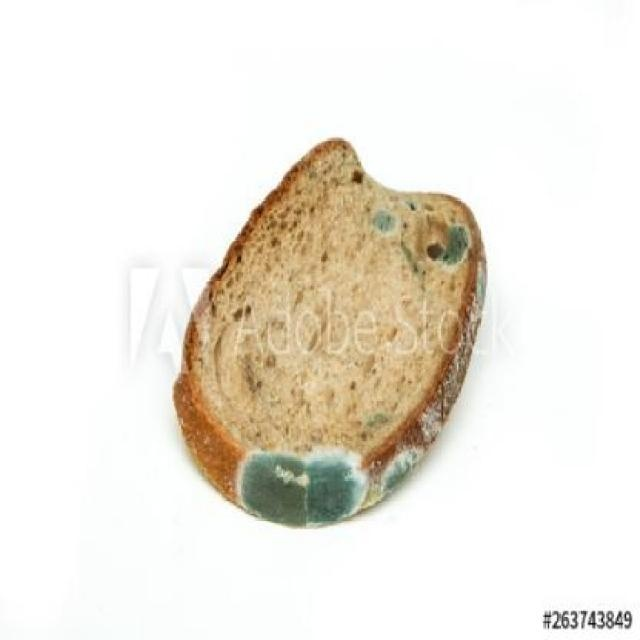

In [ ]:
for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg'):
  display(Image(filename=image_path,height=600))
  print('\n')

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=45 imgsz=640 optimizer='NAdam'

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Detection-mold-on-bread--1/data.yaml, epochs=45, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=NAdam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

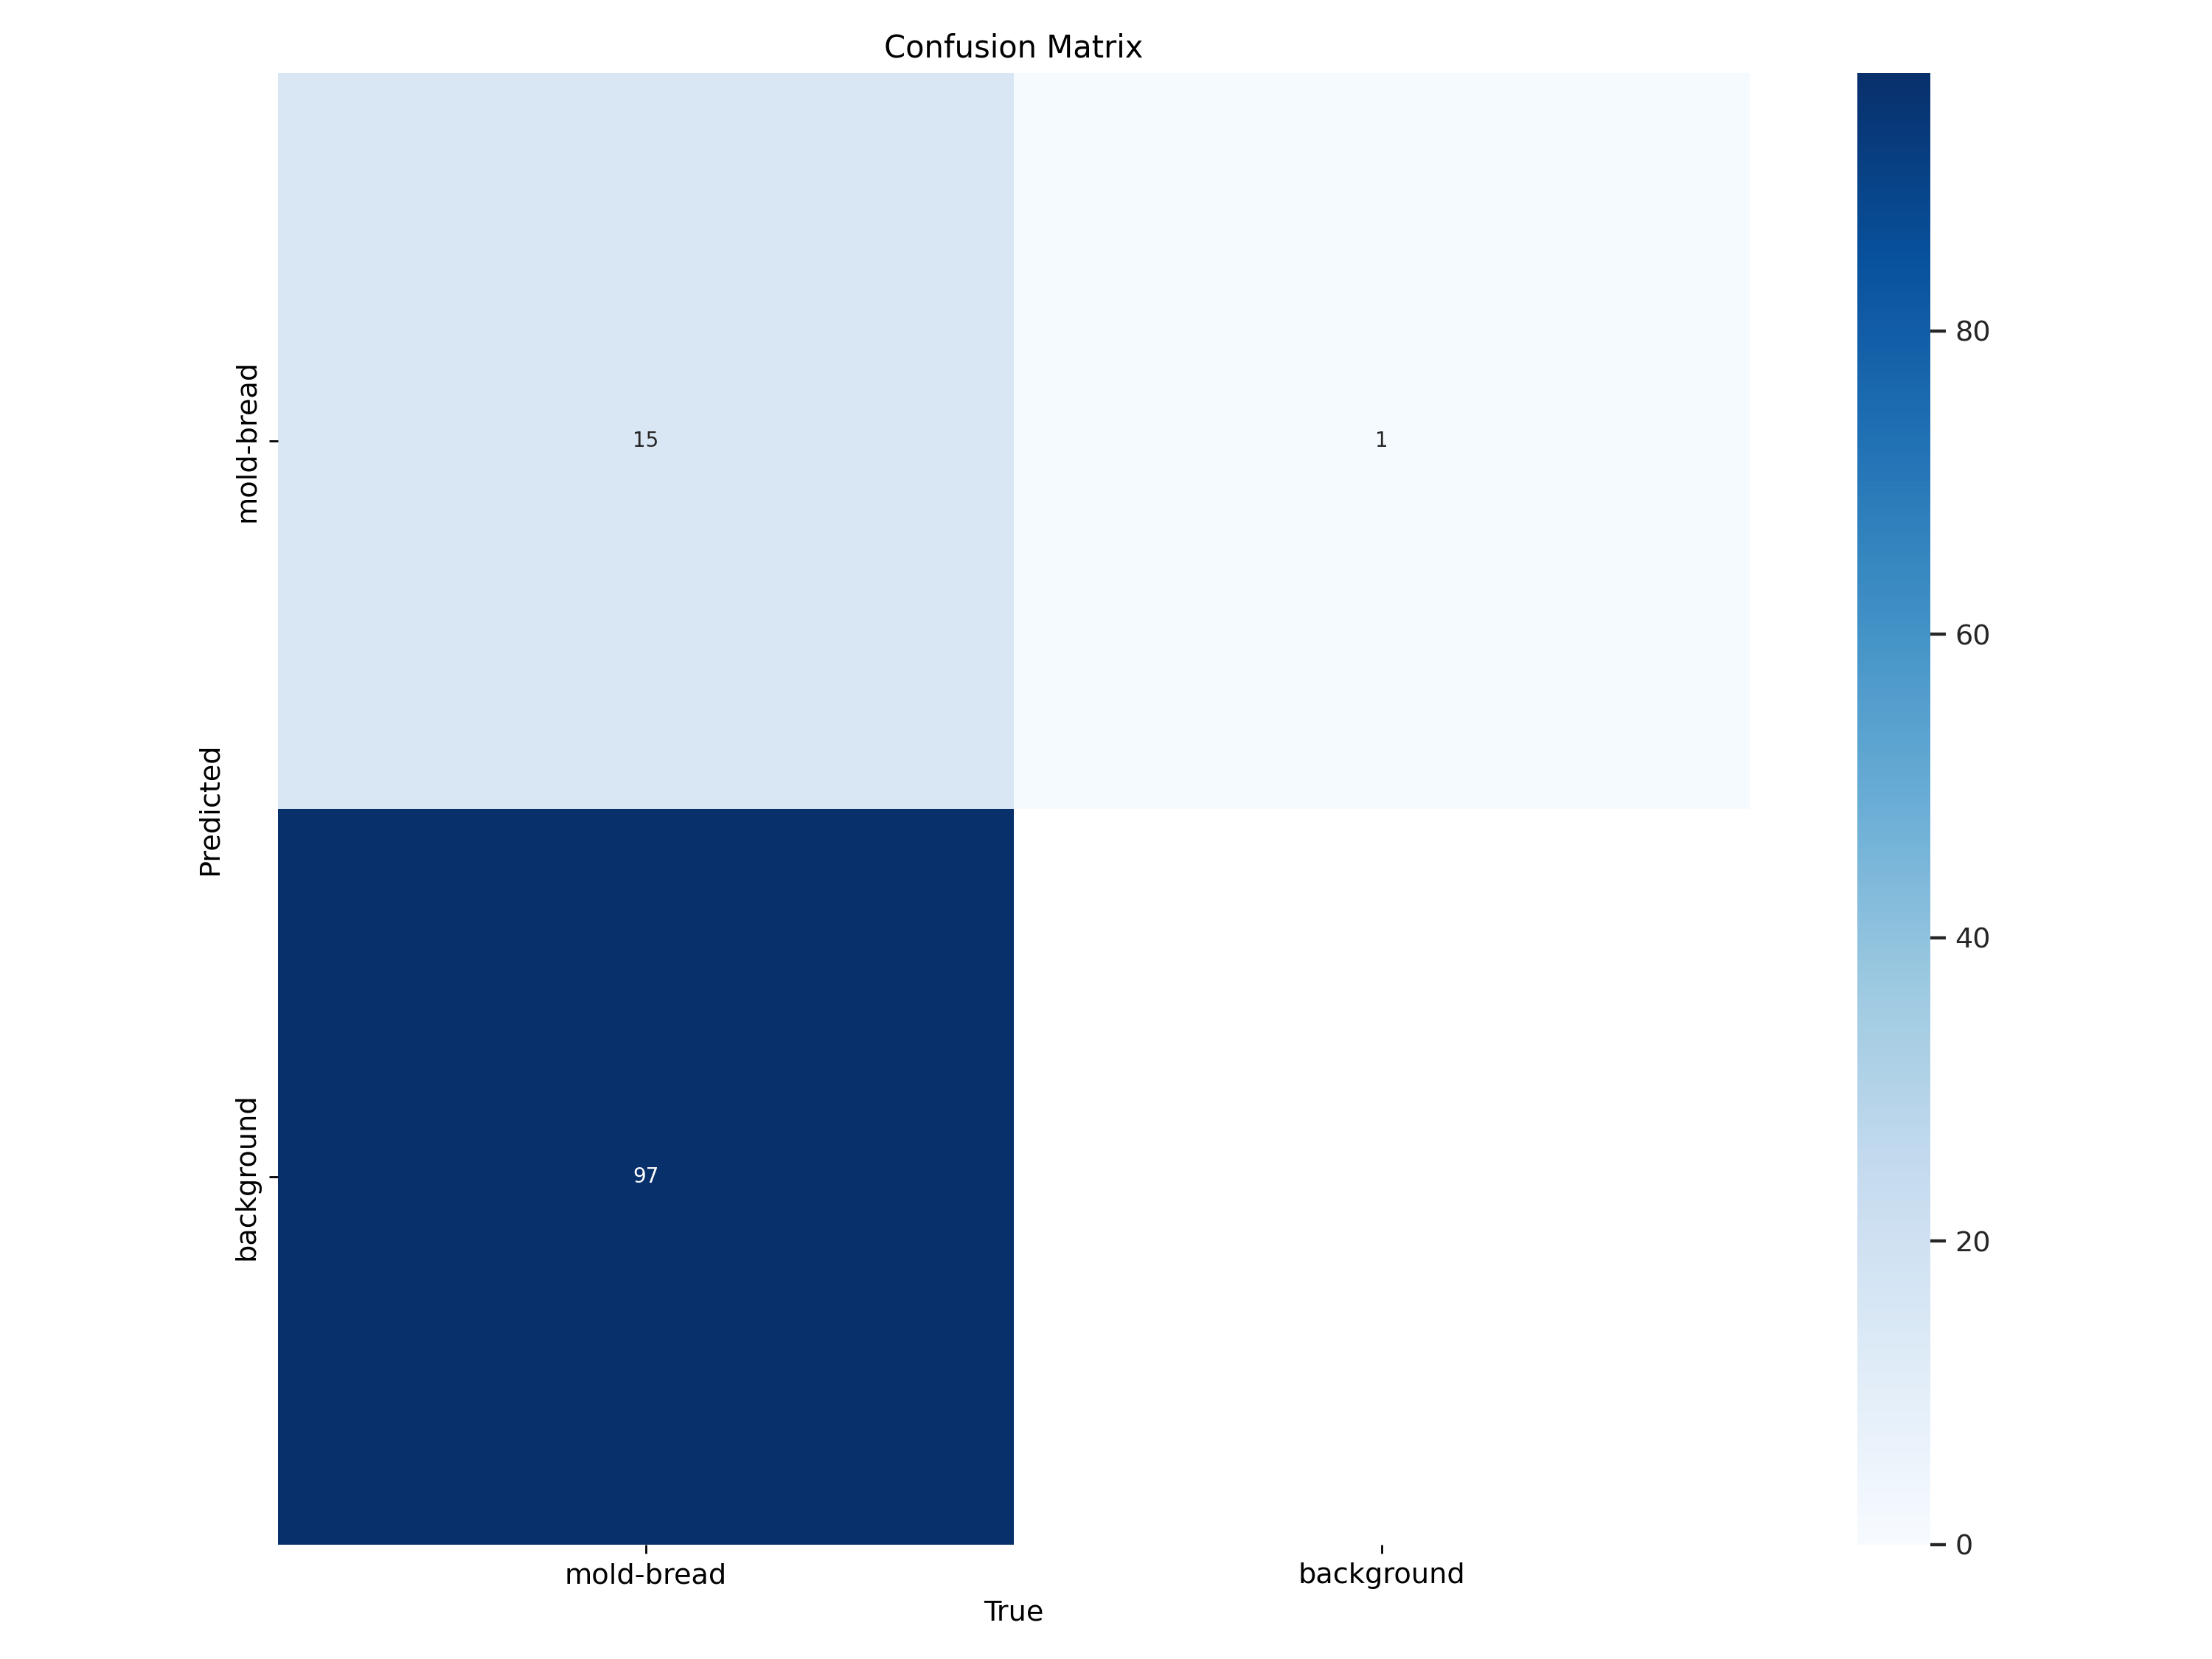

In [ ]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

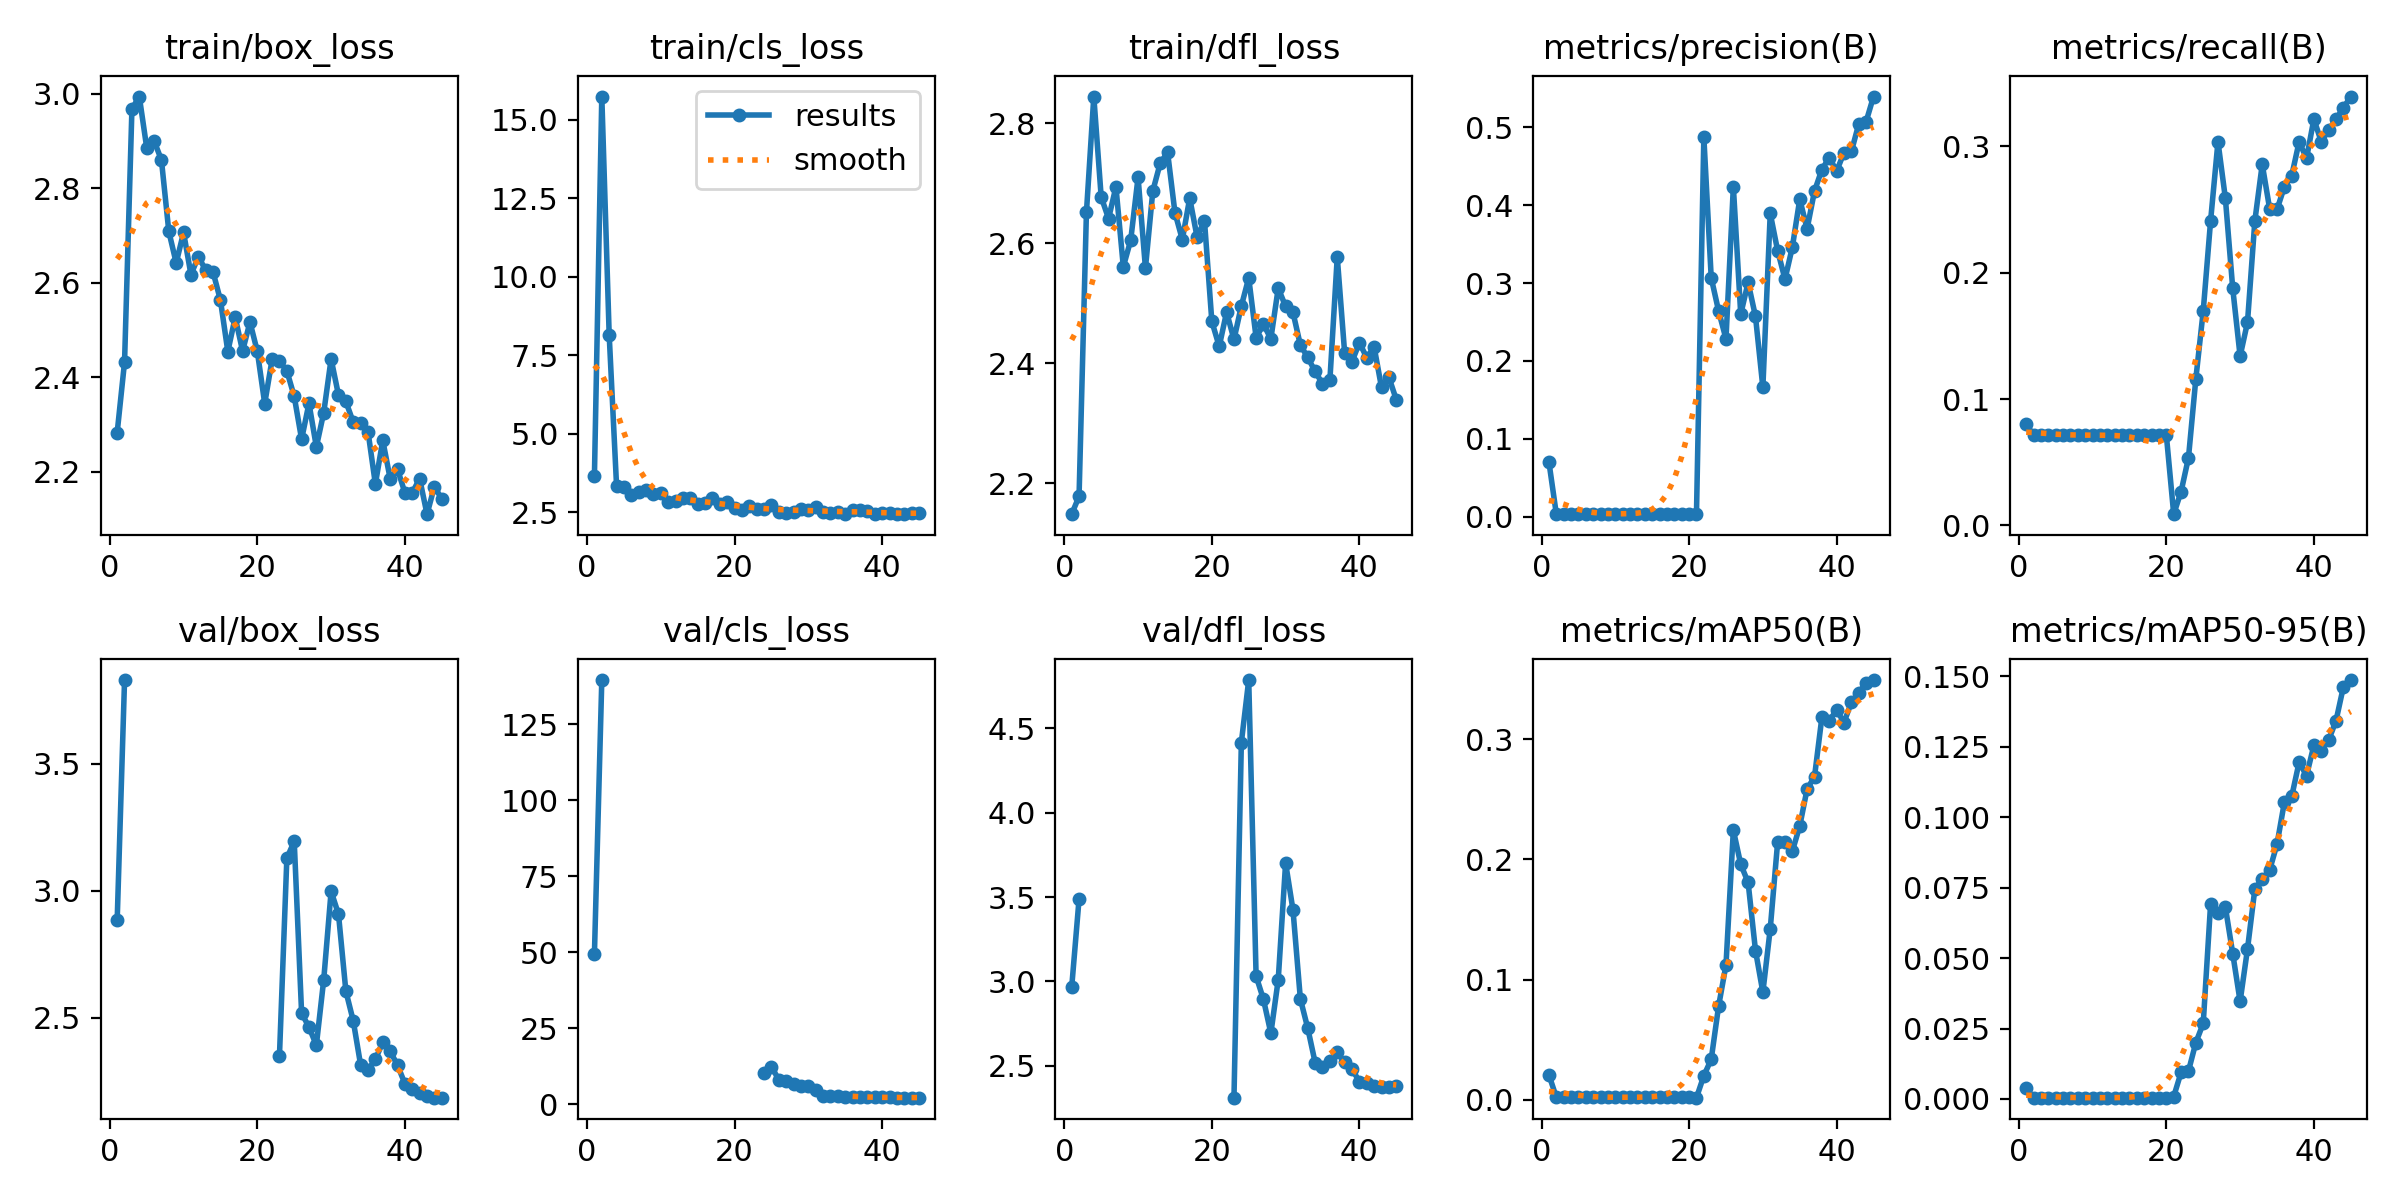

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Detection-mold-on-bread--1/valid/labels.cache... 24 images, 0 backgrounds, 0 corrupt: 100% 24/24 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.18it/s]
                   all         24        112      0.415      0.277      0.305      0.117
Speed: 0.2ms preprocess, 33.0ms inference, 0.0ms loss, 26.1ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/Detection-mold-on-bread--1/test/images

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/13 /content/Detection-mold-on-bread--1/test/images/240_F_321046579_nNviDPu6dPfLsXa707TrUwFfgg0AFBMs_jpg.rf.f2e5c7ab3179b638bafc95769a3519d9.jpg: 640x640 (no detections), 38.1ms
image 2/13 /content/Detection-mold-on-bread--1/test/images/36_jpg.rf.a2638245c9400b97df1396acd30c4290.jpg: 640x640 (no detections), 37.1ms
image 3/13 /content/Detection-mold-on-bread--1/test/images/38195601956_590638ef2a_m_jpg.rf.70f4b07a80a944e6db4b00e952d268bd.jpg: 640x640 (no detections), 37.0ms
image 4/13 /content/Detection-mold-on-bread--1/test/images/49217592852_c45eacc178_m_jpg.rf.bf75e7c97625a0a9467dd1ee881c88f0.jpg: 640x640 (no detections), 36.9ms
image 5/13 /content/Detection-mold-on-bread--1/test/images/58_jpg.rf.9093b2bffd20ad689fc0e030280e5906.jpg: 640x640 (no detections), 29.5ms
image 6/13 /content/Detection-mold-on-bread--1

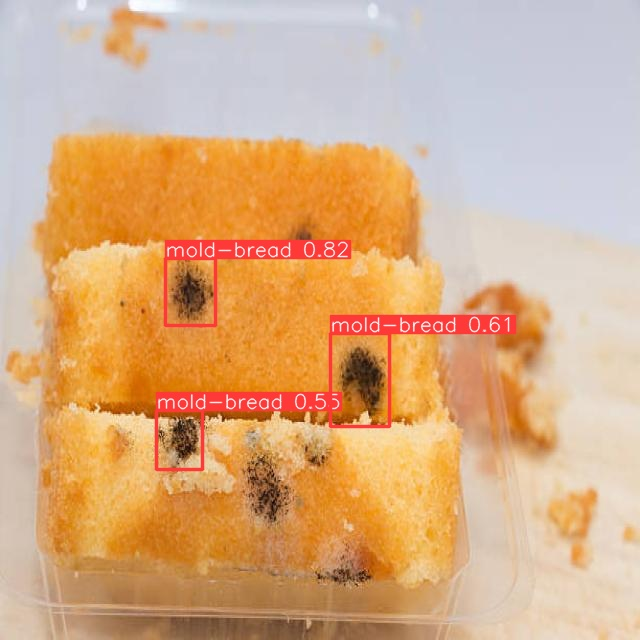

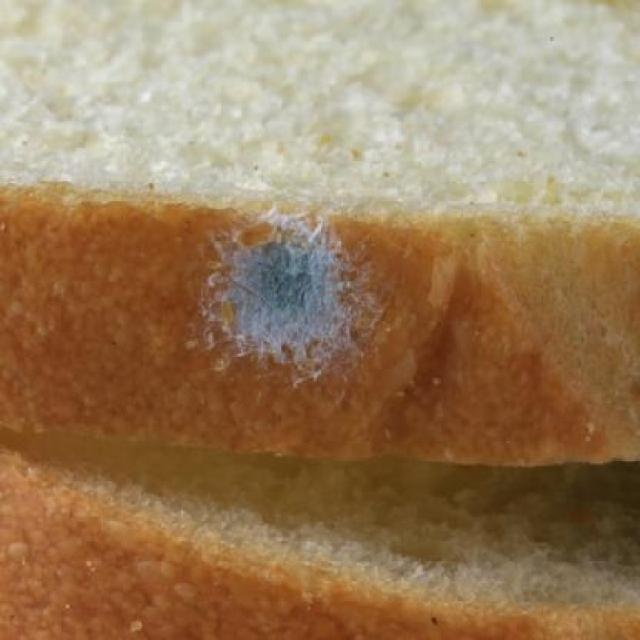

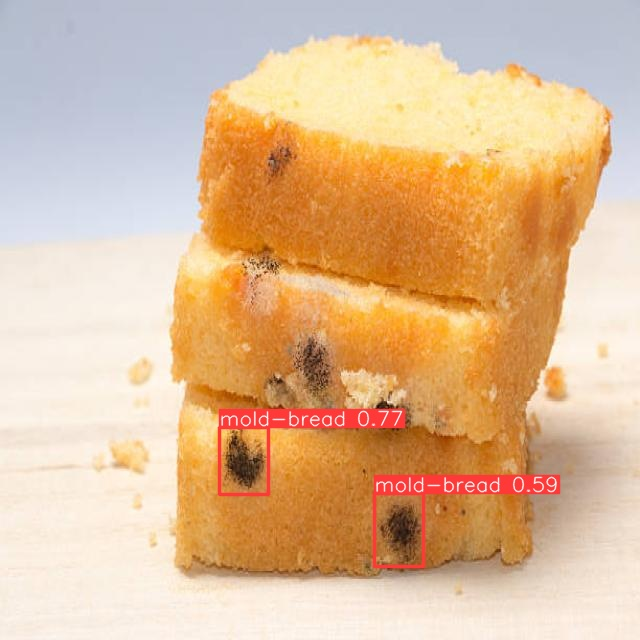

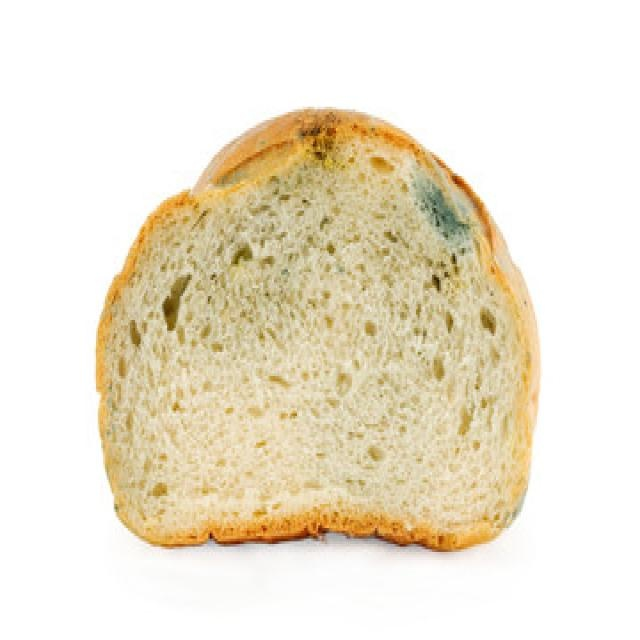

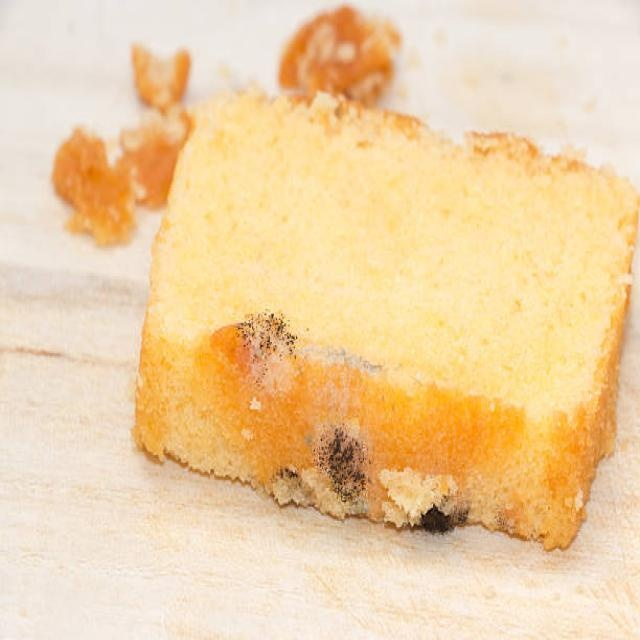

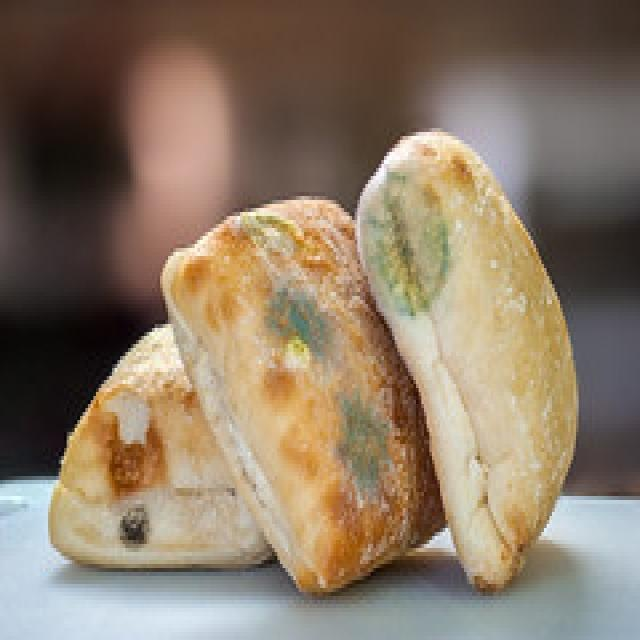

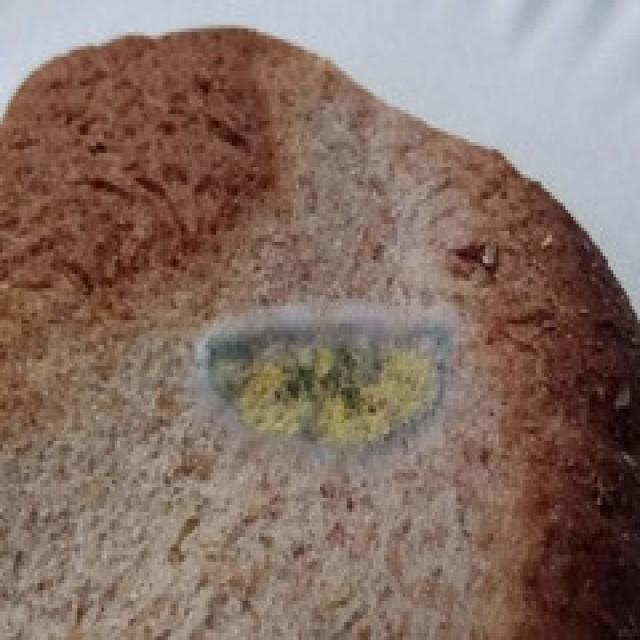

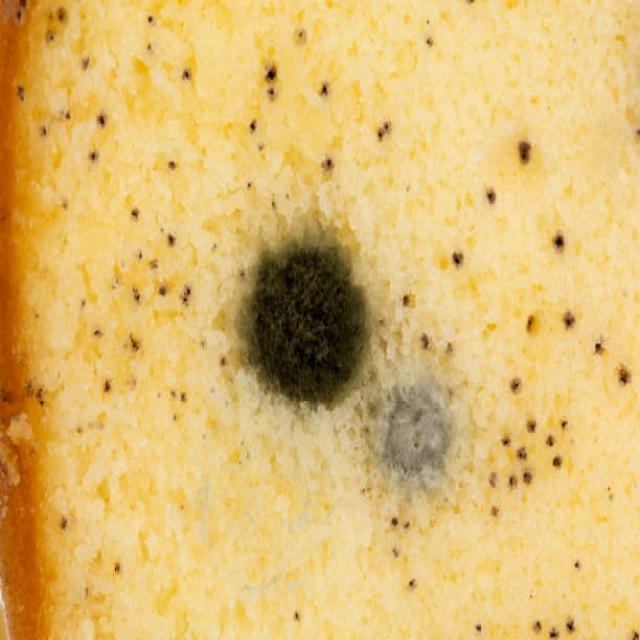

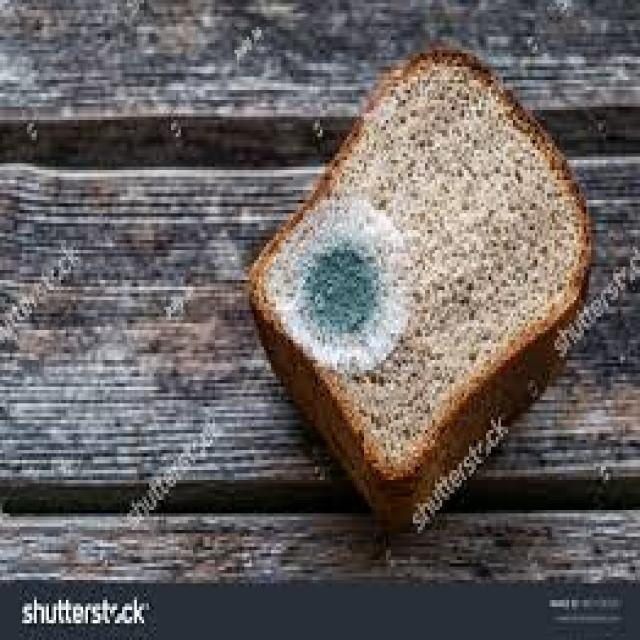

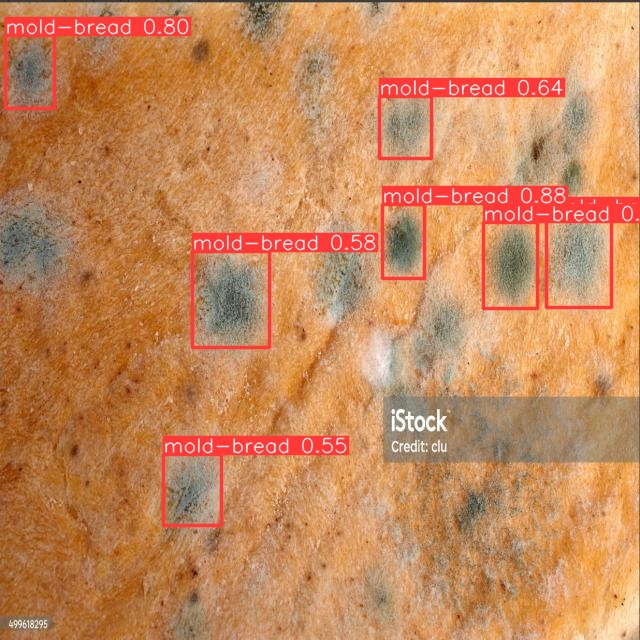

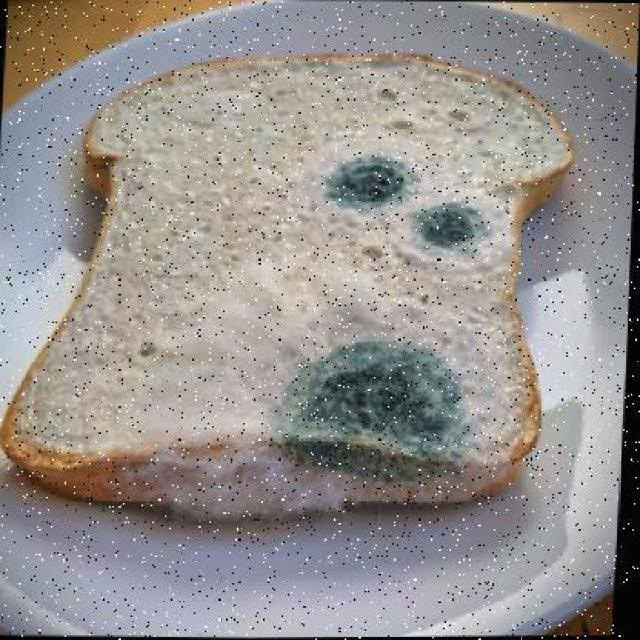

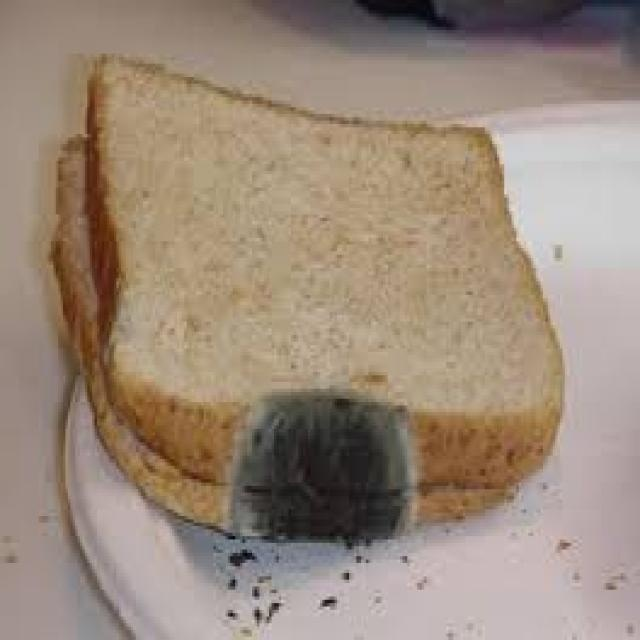

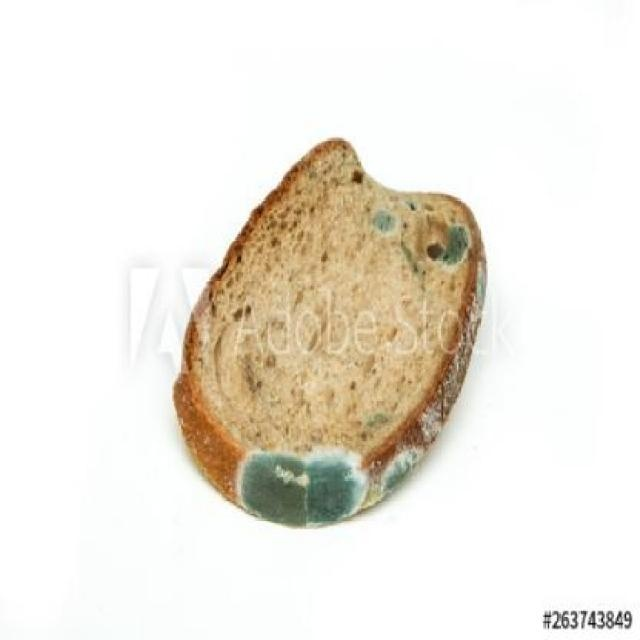

In [ ]:
for image_path in glob.glob(f'/content/runs/detect/predict3/*.jpg'):
  display(Image(filename=image_path,height=600))
  print('\n')